## SAY SOMETHING HERE

A company-year long format xt panel data table, 2005-2016 
 n = 287,829 observations (46,412 firms)
	(third as many companies in 2016 as in earlier years)
 - ID variables	comp_id	(numerical) company identifier
- year	(calendar) year

 other important variables
 
- exit_year	year of exit (missing if still in business on 2016.12.31) 
- sales		sales in year (EUR)
- curr_assets	current assets at end of year (EUR)
- ind2		2-digit NACE industry code

DEFAULT =  Existed in 2014 (sales > 0), but did not exists in 2015 (sales is 0 or missing)

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.metrics import brier_score_loss, roc_curve, auc, confusion_matrix, roc_auc_score, mean_squared_error, accuracy_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cs_bisnode_panel.zip')
data

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1.001034e+06,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1.001034e+06,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1.001034e+06,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1.001034e+06,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1.001034e+06,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,2011-01-01,2011-12-31,NaN,0.000000,1807.407349,3.703704,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287825,4.641209e+11,2012-01-01,2012-12-31,NaN,0.000000,1518.518555,96.296295,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287826,4.641209e+11,2013-01-01,2013-12-31,NaN,0.000000,988.888916,77.777779,0.0,0.0,0.0,...,NaN,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287827,4.641209e+11,2014-01-01,2014-12-31,NaN,0.000000,644.444458,233.333328,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN


In [3]:
data = data.loc[data['ind2'] == 26]
data
#data for specific industry

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
960,6.538183e+06,2005-01-01,2005-12-31,NaN,792.592590,6237.037109,348.148163,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
961,6.538183e+06,2006-01-01,2006-12-31,NaN,196.296295,6007.407227,451.851837,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
962,6.538183e+06,2007-01-01,2007-12-31,NaN,233.333328,9007.407227,2637.037109,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
963,6.538183e+06,2008-01-01,2008-12-31,NaN,422.222229,7707.407227,1651.851807,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
964,6.538183e+06,2009-01-01,2009-12-31,NaN,1525.925903,18196.296875,8714.814453,18.518518,0.0,-18.518518,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287439,4.628231e+11,2012-01-01,2012-12-31,NaN,359.259247,21662.962891,19481.482422,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.333333
287440,4.628231e+11,2013-01-01,2013-12-31,NaN,3159.259277,15488.888672,21440.740234,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.298611
287441,4.628231e+11,2014-01-01,2014-12-31,NaN,2581.481445,70059.257812,74911.109375,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.486111
287442,4.628231e+11,2015-01-01,2015-12-31,NaN,2177.777832,46062.964844,49844.445312,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.562500


In [4]:
#creating y variable ('default')
# generate status_alive; if sales larger than zero and not-NA, then firm is alive
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)

# defaults in 1 year if there are sales in this year but no sales one year later
# Status_in_one_year: data.groupby('comp_id')['status_alive'].shift(-1)
data["default"] = (
    (data["status_alive"] == 1)
    & (data.groupby("comp_id")["status_alive"].shift(-1) == 0)
).astype(int)

y = data['default']

In [5]:
#y.value_counts()

In [167]:
#cleaning dataset:

#x = amort, curr_assets, curr_liab, extra_exp, extra_inc, fixed_assets, inc_bef_tax, intang_assets, inventories
#liq_assets, material_exp, personnel_exp, profit_loss_year, share_eq, subscribed_cap, tang_assets
#ceo_count, foreign_ceo (%), female(%), inoffice_days, *gender(female_only, male_only, mixed_gender),
#*origin(domestic, not_domestic, mix), urban_m (capital city, big_city, other_hq_city), *region_m (Central, East, West)


#imputing missing amort values with median (less affected by outliers)
#creating flag_variable for missing values and imputed values
data.amort.isnull().sum()
data['amort_missing_flag'] = data.amort.isnull().astype(int)
data['amort_imputed_flag'] = data.amort.isnull().astype(int)
data.fillna({'amort':data['amort'].median()}, inplace = True)

#imputing missing curr_assets values with median
#creating flag_variable for missing values and imputed values
data.curr_assets.isnull().sum()
data['curr_assets_missing_flag'] = data.curr_assets.isnull().astype(int)
data['curr_assets_imputed_flag'] = data.curr_assets.isnull().astype(int)
data.fillna({'curr_assets':data['curr_assets'].median()}, inplace = True)

#imputing missing curr_liab values with median
#creating flag_variable for missing values and imputed values
data.curr_liab.isnull().sum()
data['curr_liab_missing_flag'] = data.curr_liab.isnull().astype(int)
data['curr_liab_imputed_flag'] = data.curr_liab.isnull().astype(int)
data.fillna({'curr_liab':data['curr_liab'].median()}, inplace = True)

#imputing missing extra_exp values with median
#creating flag_variable for missing values and imputed values
data.extra_exp.isnull().sum()
data['extra_exp_missing_flag'] = data.extra_exp.isnull().astype(int)
data['extra_exp_imputed_flag'] = data.extra_exp.isnull().astype(int)
data.fillna({'extra_exp':data['extra_exp'].median()}, inplace = True)

#imputing missing extra_inc values with median
#creating flag_variable for missing values and imputed values
data.extra_inc.isnull().sum()
data['extra_inc_missing_flag'] = data.extra_inc.isnull().astype(int)
data['extra_inc_imputed_flag'] = data.extra_inc.isnull().astype(int)
data.fillna({'extra_inc':data['extra_inc'].median()}, inplace = True)

#delete finished_prof column (too many null values): 13054/14877
data = data.drop('finished_prod', axis=1)

#imputing missing fixed_assets values with median
#creating flag_variable for missing values and imputed values
data.fixed_assets.isnull().sum()
data['fixed_assets_missing_flag'] = data.fixed_assets.isnull().astype(int)
data['fixed_assets_imputed_flag'] = data.fixed_assets.isnull().astype(int)
data.fillna({'fixed_assets':data['fixed_assets'].median()}, inplace = True)

#imputing missing inc_bef_tax values with median
#creating flag_variable for missing values and imputed values
data.inc_bef_tax.isnull().sum()
data['inc_bef_tax_missing_flag'] = data.inc_bef_tax.isnull().astype(int)
data['inc_bef_tax_imputed_flag'] = data.inc_bef_tax.isnull().astype(int)
data.fillna({'inc_bef_tax':data['inc_bef_tax'].median()}, inplace = True)

#imputing missing intang_assets values with median
#creating flag_variable for missing values and imputed values
data.intang_assets.isnull().sum()
data['intang_assets_missing_flag'] = data.intang_assets.isnull().astype(int)
data['intang_assets_imputed_flag'] = data.intang_assets.isnull().astype(int)
data.fillna({'intang_assets':data['intang_assets'].median()}, inplace = True)

#imputing missing inventories values with median
#creating flag_variable for missing values and imputed values
data.inventories.isnull().sum()
data['inventories_missing_flag'] = data.inventories.isnull().astype(int)
data['inventories_imputed_flag'] = data.inventories.isnull().astype(int)
data.fillna({'inventories':data['inventories'].median()}, inplace = True)

#imputing missing liq_assets values with median
#creating flag_variable for missing values and imputed values
data.liq_assets.isnull().sum()
data['liq_assets_missing_flag'] = data.liq_assets.isnull().astype(int)
data['liq_assets_imputed_flag'] = data.liq_assets.isnull().astype(int)
data.fillna({'liq_assets':data['liq_assets'].median()}, inplace = True)

#imputing missing material_exp values with median
#creating flag_variable for missing values and imputed values
data.material_exp.isnull().sum()
data['material_exp_missing_flag'] = data.material_exp.isnull().astype(int)
data['material_exp_imputed_flag'] = data.material_exp.isnull().astype(int)
data.fillna({'material_exp':data['material_exp'].median()}, inplace = True)

#delete net_dom_sales column (too many null values): 13022/14877
data = data.drop('net_dom_sales', axis=1)

#delete net_exp_sales column (too many null values): 13022/14877
data = data.drop('net_exp_sales', axis=1)

#imputing missing personnel_exp values with median
#creating flag_variable for missing values and imputed values
data.personnel_exp.isnull().sum()
data['personnel_exp_missing_flag'] = data.personnel_exp.isnull().astype(int)
data['personnel_exp_imputed_flag'] = data.personnel_exp.isnull().astype(int)
data.fillna({'personnel_exp':data['personnel_exp'].median()}, inplace = True)

#imputing missing profit_loss_year values with median
#creating flag_variable for missing values and imputed values
data.profit_loss_year.isnull().sum()
data['profit_loss_year_missing_flag'] = data.profit_loss_year.isnull().astype(int)
data['profit_loss_year_imputed_flag'] = data.profit_loss_year.isnull().astype(int)
data.fillna({'profit_loss_year':data['profit_loss_year'].median()}, inplace = True)

#imputing missing share_eq values with median
#creating flag_variable for missing values and imputed values
data.share_eq.isnull().sum()
data['share_eq_year_missing_flag'] = data.share_eq.isnull().astype(int)
data['share_eq_year_imputed_flag'] = data.share_eq.isnull().astype(int)
data.fillna({'share_eq':data['share_eq'].median()}, inplace = True)

#imputing missing subscribed_cap values with median
#creating flag_variable for missing values and imputed values
data.subscribed_cap.isnull().sum()
data['subscribed_cap_missing_flag'] = data.subscribed_cap.isnull().astype(int)
data['subscribed_cap_imputed_flag'] = data.subscribed_cap.isnull().astype(int)
data.fillna({'subscribed_cap':data['subscribed_cap'].median()}, inplace = True)

#imputing missing tang_assets values with median
#creating flag_variable for missing values and imputed values
data.tang_assets.isnull().sum()
data['tang_assets_missing_flag'] = data.tang_assets.isnull().astype(int)
data['tang_assets_imputed_flag'] = data.tang_assets.isnull().astype(int)
data.fillna({'tang_assets':data['tang_assets'].median()}, inplace = True)

#delete wages column (too many null values): 13060/14877
data = data.drop('wages', axis=1)

#imputing missing ceo_count values with median
#creating flag_variable for missing values and imputed values
data.ceo_count.isnull().sum()
data['ceo_count_missing_flag'] = data.ceo_count.isnull().astype(int)
data['ceo_count_imputed_flag'] = data.ceo_count.isnull().astype(int)
data.fillna({'ceo_count':data['ceo_count'].median()}, inplace = True)

#imputing missing foreign values with median (% of foreign CEOs)
#creating flag_variable for missing values and imputed values
data.rename(columns= {'foreign':'foreign_ceo'}, inplace = True)
data.foreign_ceo.isnull().sum()
data['foreign_ceo_missing_flag'] = data.foreign_ceo.isnull().astype(int)
data['foreign_ceo_imputed_flag'] = data.foreign_ceo.isnull().astype(int)
data.fillna({'foreign_ceo':data['foreign_ceo'].median()}, inplace = True)

#imputing missing female values with median (% of female CEOs)
#creating flag_variable for missing values and imputed values
data.female.isnull().sum()
data['female_missing_flag'] = data.female.isnull().astype(int)
data['female_imputed_flag'] = data.female.isnull().astype(int)
data.fillna({'female':data['female'].median()}, inplace = True)

#imputing missing inoffice_days values with median (could use median or mean in this case as distribution is not skewed- using median for consistency)
#creating flag_variable for missing values and imputed values
data.inoffice_days.isnull().sum()
data['inoffice_days_missing_flag'] = data.inoffice_days.isnull().astype(int)
data['inoffice_days_imputed_flag'] = data.inoffice_days.isnull().astype(int)
data.fillna({'inoffice_days':data['inoffice_days'].median()}, inplace = True)

#impute the nan gender values with mode (categorical variable)
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
#categorical variable gender (female only, male only, or mixed)
data['female_only'] = (data['gender'] == 'female').astype(int)
data['male_only'] = (data['gender'] == 'male').astype(int)
data['mixed_gender'] = (data['gender'] == 'mix').astype(int)

#impute the nan origin values with mode (categorical variable)
data['origin'] = data['origin'].fillna(data['origin'].mode()[0])
#categorical variable origin (domestic, not_domestic, mix)
data['domestic'] = (data['origin'] == 'Domestic').astype(int)
data['not_domestic'] = (data['origin'] == 'foreign').astype(int)
data['mix'] = (data['origin'] == 'mix').astype(int)

#impute the nan urban_m values with mode (categorical variable)
data['urban_m'] = data['urban_m'].fillna(data['urban_m'].mode()[0])
#categorical variable urban_m (1- capital city, 2-other big city, 3-other)
data['capital_city'] = (data['urban_m'] == 1).astype(int)
data['big_city'] = (data['urban_m'] == 2).astype(int)
data['other_hq_city'] = (data['urban_m'] == 3).astype(int)

#impute the nan region_m values with mode (categorical variable)
data['region_m'] = data['region_m'].fillna(data['region_m'].mode()[0])
#categorical variable region_m (Central, East, West)
data['central'] = (data['region_m'] == 'Central').astype(int)
data['east'] = (data['region_m'] == 'East').astype(int)
data['west'] = (data['region_m'] == 'West').astype(int)

KeyError: "['finished_prod'] not found in axis"

In [168]:
[col for col in data.columns if 'foreign' in col]

['foreign_ceo',
 'foreign_ceo_missing_flag',
 'foreign_ceo_imputed_flag',
 'foreign',
 'interaction_inoffice_days_vs_foreign_ceo',
 'interaction_inoffice_days_vs_foreign']

In [8]:
variables = ['amort', 'curr_assets', 'curr_liab', 'extra_exp', 'extra_inc', 'fixed_assets', 'inc_bef_tax', 
             'intang_assets', 'inventories','liq_assets', 'material_exp', 'personnel_exp', 'profit_loss_year',
             'share_eq', 'subscribed_cap', 'tang_assets', 'ceo_count', 'foreign_ceo', 'female', 
             'inoffice_days', 'female_only', 'male_only', 'domestic', 'foreign', 'capital_city','other_hq_city',
             'east', 'west']
#reference group for gender is mixed_gender firms
#refrence group for origin is mix CEO origin
#reference group for urban_m is big_city HQ location
#reference group for region_m is Central HQ region

In [9]:
len(data.columns)

98

### Creating holdout and training samples

In [10]:
#criteria for the holdout sample so I can mask the training sample with !holdout_criteria
holdout_criteria = (data['year'] == 2014) & ((data['sales'] >=1000) & (data['sales']<=10000000))

In [11]:
#holdout sample creation
holdout = data[holdout_criteria]
print(f'Holdout shape: {holdout.shape}')
holdout.head()

Holdout shape: (1037, 98)


,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,mixed_gender,domestic,foreign,mix,capital_city,big_city,other_hq_city,central,east,west
969,6538183.0,2014-01-01,2014-12-31,NaN,1018.518494,17022.222656,3040.740723,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0
1128,8416055.0,2014-01-01,2014-12-31,NaN,425.925934,105740.742188,6918.518555,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
1467,12428378.0,2014-01-01,2014-12-31,NaN,0.000000,0.000000,9277.777344,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,0
1706,17776540.0,2014-01-01,2014-12-31,NaN,48.148148,142296.296875,164237.031250,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
1735,18626760.0,2014-01-01,2014-12-31,NaN,5755.555664,95185.187500,45766.667969,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1


In [12]:
holdout.default.value_counts()
#no matter what I do I get 26 companies defaulted...so, sticking with 26 firms defaulted for now

default
0    1011
1      26
Name: count, dtype: int64

In [13]:
training = data[~holdout_criteria]
training = training.loc[training['year'] != 2016]
print(f'Training shape: {training.shape}')
training.head()

Training shape: (13252, 98)


,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,mixed_gender,domestic,foreign,mix,capital_city,big_city,other_hq_city,central,east,west
960,6538183.0,2005-01-01,2005-12-31,NaN,792.592590,6237.037109,348.148163,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
961,6538183.0,2006-01-01,2006-12-31,NaN,196.296295,6007.407227,451.851837,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
962,6538183.0,2007-01-01,2007-12-31,NaN,233.333328,9007.407227,2637.037109,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
963,6538183.0,2008-01-01,2008-12-31,NaN,422.222229,7707.407227,1651.851807,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
964,6538183.0,2009-01-01,2009-12-31,NaN,1525.925903,18196.296875,8714.814453,18.518518,0.0,-18.518518,...,0,0,0,0,0,1,0,0,1,0


In [14]:
training.default.value_counts()

default
0    12898
1      354
Name: count, dtype: int64

## Model 1: Simple Linear Logistic Regression (Logit)

In [127]:
##interactions

training['interaction_curr_assets_vs_curr_liab'] = training['curr_assets'] * training['curr_liab']
training['interaction_inoffice_days_vs_foreign_ceo'] = training['inoffice_days'] * training['foreign_ceo']
training['tang_vs_liq_assets'] = training['tang_assets'] * training['liq_assets']
training['female_vs_male'] = training['female_only']  * training['male_only']

interaction_terms = ['interaction_curr_assets_vs_curr_liab', 'interaction_inoffice_days_vs_foreign_ceo', 'tang_vs_liq_assets', 'female_vs_male']

In [128]:
basevars = training[variables]
base_interactions = training[interaction_terms]
X1 = pd.concat([basevars, base_interactions], axis=1)

In [133]:
y = training['default']

In [134]:
ols_modelx1 = LinearRegression().fit(X1, y)

In [135]:
#function from ch17 Jp Nb to get regression results
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [136]:
#linear regression results
regression_results(y, ols_modelx1.predict(X1))

explained_variance:  0.003
r2:  0.003
MAE:  0.0522
MSE:  0.0259
RMSE:  0.161


In [137]:
#cross-validating model 
from sklearn.linear_model import LogisticRegressionCV

logistic_model = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model.fit(X1, y)

LogisticRegressionCV(cv=5)

In [138]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y_pred = logistic_model.predict(X1)
print("Classification Report:\n", classification_report(y, y_pred))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model.predict_proba(X1)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     12898
           1       0.00      0.00      0.00       354

    accuracy                           0.97     13252
   macro avg       0.49      0.50      0.49     13252
weighted avg       0.95      0.97      0.96     13252

AUC-ROC Score: 0.5


In [139]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model.scores_)


Cross-Validated Scores:
 {1: array([[0.97321765, 0.97321765, 0.97321765, 0.97321765, 0.97321765,
        0.97321765, 0.97321765, 0.97321765, 0.97321765, 0.97321765],
       [0.97321765, 0.97321765, 0.97321765, 0.97321765, 0.97321765,
        0.97321765, 0.97321765, 0.97321765, 0.97321765, 0.97321765],
       [0.97358491, 0.97358491, 0.97358491, 0.97358491, 0.97358491,
        0.97358491, 0.97358491, 0.97358491, 0.97358491, 0.97358491],
       [0.97320755, 0.97320755, 0.97320755, 0.97320755, 0.97320755,
        0.97320755, 0.97320755, 0.97320755, 0.97320755, 0.97320755],
       [0.97320755, 0.97320755, 0.97320755, 0.97320755, 0.97320755,
        0.97320755, 0.97320755, 0.97320755, 0.97320755, 0.97320755]])}


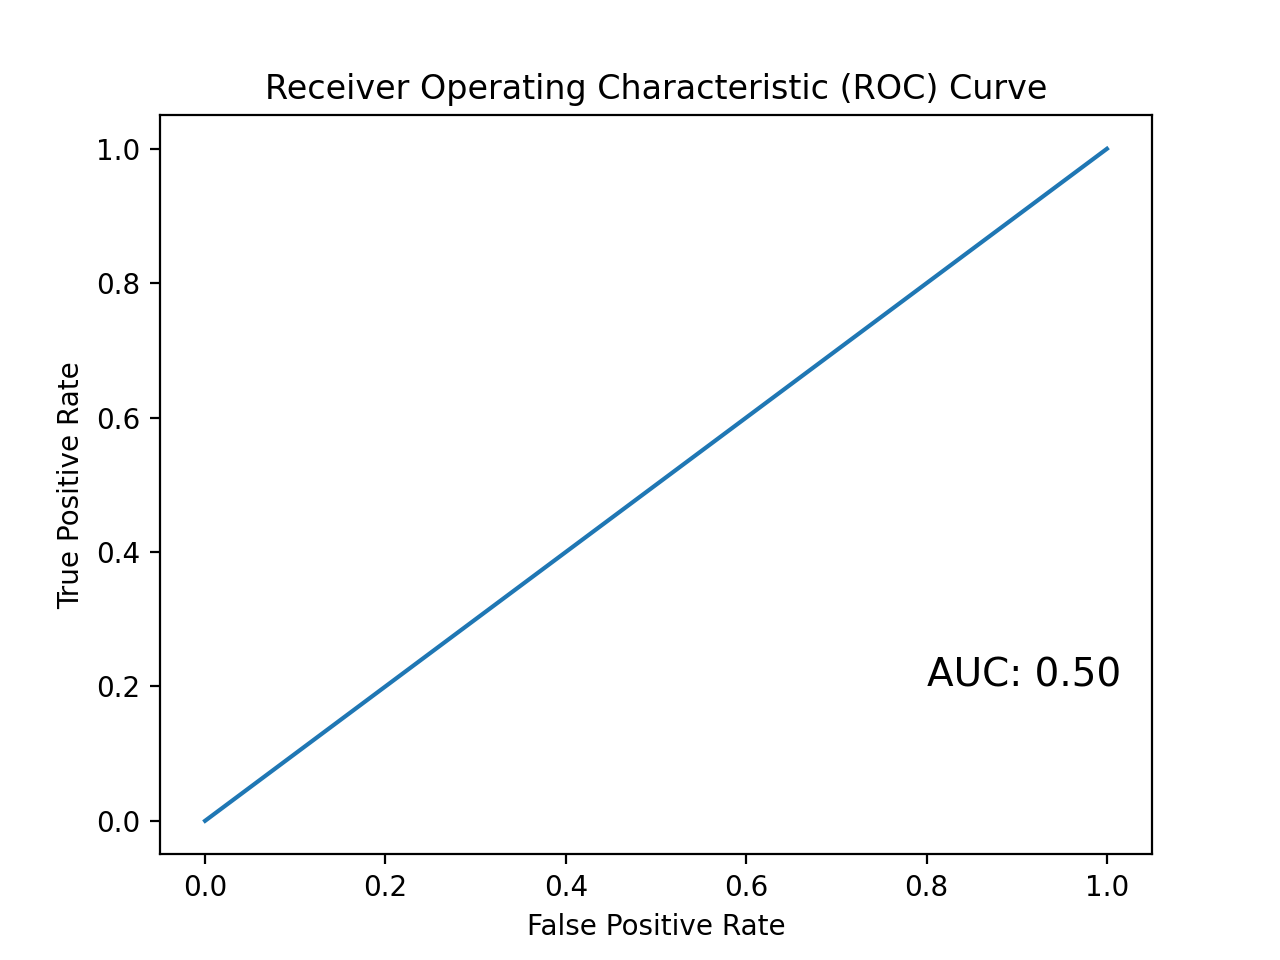

Optimal Threshold: inf


In [140]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba(X1)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("Optimal Threshold:", optimal_threshold)



In [141]:
X2 = training[variables[:9]]

In [142]:
ols_modelx2 = LinearRegression().fit(X2, y)

In [143]:
#linear regression results
regression_results(y, ols_modelx2.predict(X2))

explained_variance:  0.0009
r2:  0.0009
MAE:  0.0522
MSE:  0.026
RMSE:  0.1612


In [144]:
#cross-validating model 
logistic_model2 = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model2.fit(X2, y)

LogisticRegressionCV(cv=5)

In [145]:
y_pred2= logistic_model2.predict(X2)
print("Classification Report:\n", classification_report(y, y_pred2))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model2.predict_proba(X2)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     12898
           1       0.06      0.12      0.08       354

    accuracy                           0.93     13252
   macro avg       0.52      0.53      0.52     13252
weighted avg       0.95      0.93      0.94     13252

AUC-ROC Score: 0.6960660698939003


In [146]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model2.scores_)


Cross-Validated Scores:
 {1: array([[0.89928329, 0.89928329, 0.89928329, 0.89928329, 0.89928329,
        0.89928329, 0.89928329, 0.89928329, 0.89928329, 0.89928329],
       [0.9298378 , 0.9298378 , 0.9298378 , 0.9298378 , 0.9298378 ,
        0.9298378 , 0.9298378 , 0.9298378 , 0.9298378 , 0.9298378 ],
       [0.95962264, 0.95849057, 0.95735849, 0.95735849, 0.95735849,
        0.95735849, 0.95735849, 0.95735849, 0.95735849, 0.95735849],
       [0.94528302, 0.94528302, 0.94528302, 0.94528302, 0.94528302,
        0.94528302, 0.94528302, 0.94528302, 0.94528302, 0.94528302],
       [0.9290566 , 0.92943396, 0.92943396, 0.92943396, 0.92943396,
        0.92943396, 0.92943396, 0.92943396, 0.92943396, 0.92943396]])}


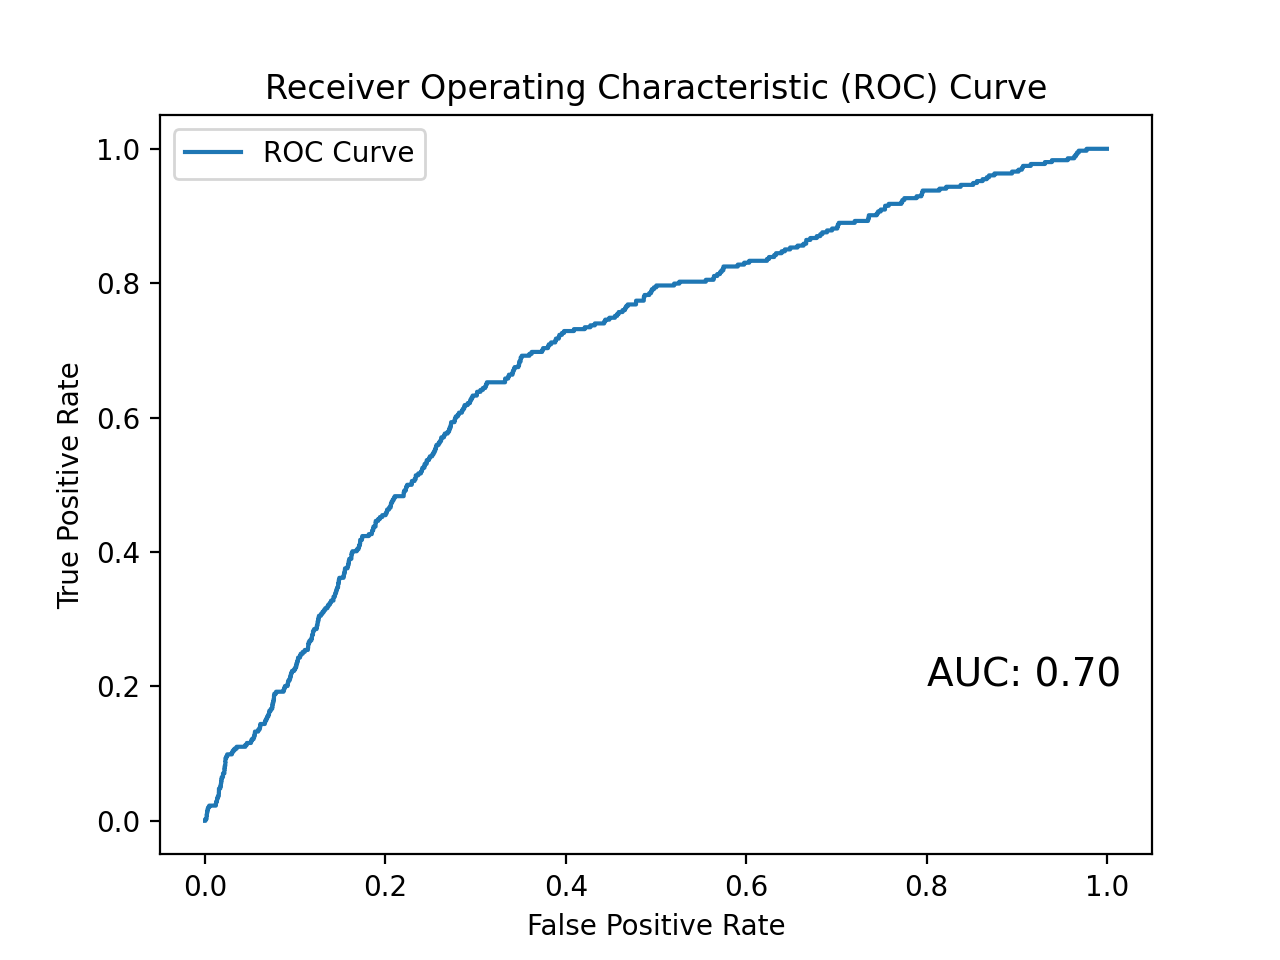

Optimal Threshold: 0.45


In [147]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y, logistic_model2.predict_proba(X2)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold2= thresholds[np.argmax(tpr - fpr)]
print(f"Optimal Threshold: {optimal_threshold2:.2f}")

In [148]:
X3 = training[variables[:18]]

In [149]:
ols_modelx3 = LinearRegression().fit(X3, y)

In [150]:
#linear regression results
regression_results(y, ols_modelx3.predict(X3))

explained_variance:  0.0017
r2:  0.0017
MAE:  0.0522
MSE:  0.026
RMSE:  0.1611


In [151]:
#cross-validating model 
logistic_model3 = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model3.fit(X3, y)

LogisticRegressionCV(cv=5)

In [152]:
y_pred3= logistic_model3.predict(X3)
print("Classification Report:\n", classification_report(y, y_pred3))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model3.predict_proba(X3)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     12898
           1       0.07      0.09      0.08       354

    accuracy                           0.94     13252
   macro avg       0.52      0.53      0.52     13252
weighted avg       0.95      0.94      0.95     13252

AUC-ROC Score: 0.6799133663257915


In [153]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model3.scores_)


Cross-Validated Scores:
 {1: array([[0.94077707, 0.9392682 , 0.9370049 , 0.93851377, 0.93398717,
        0.93474161, 0.93323274, 0.93436439, 0.93210109, 0.93360996],
       [0.9370049 , 0.93360996, 0.93474161, 0.93474161, 0.93474161,
        0.93474161, 0.93474161, 0.93474161, 0.93474161, 0.93474161],
       [0.94943396, 0.9490566 , 0.94981132, 0.95132075, 0.95018868,
        0.95018868, 0.9509434 , 0.9509434 , 0.9509434 , 0.95018868],
       [0.94113208, 0.94301887, 0.94      , 0.93698113, 0.93811321,
        0.93886792, 0.93811321, 0.93811321, 0.93811321, 0.93811321],
       [0.95018868, 0.94981132, 0.9490566 , 0.9490566 , 0.94867925,
        0.94867925, 0.94867925, 0.94867925, 0.94867925, 0.94867925]])}


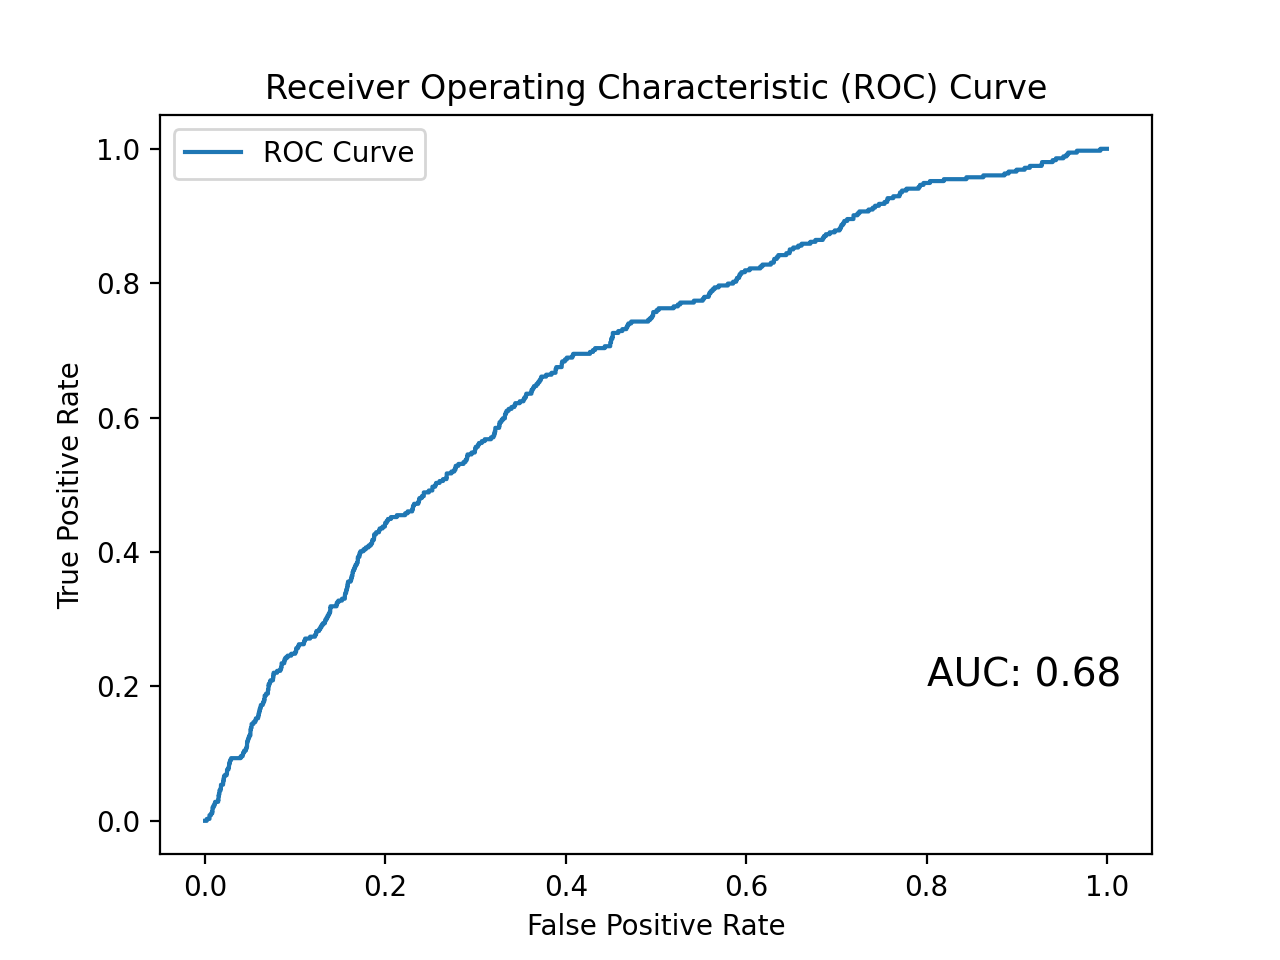

Optimal Threshold: 0.39


In [154]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y, logistic_model3.predict_proba(X3)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold3 = thresholds[np.argmax(tpr - fpr)]
print(f"Optimal Threshold: {optimal_threshold3:.2f}")

In [155]:
X4 = training[variables]

In [156]:
ols_modelx4 = LinearRegression().fit(X4, y)

In [157]:
#linear regression results
regression_results(y, ols_modelx4.predict(X4))

explained_variance:  0.0029
r2:  0.0029
MAE:  0.0522
MSE:  0.0259
RMSE:  0.161


In [158]:
#cross-validating model 
logistic_model4 = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model4.fit(X4, y)

LogisticRegressionCV(cv=5)

In [159]:
y_pred4= logistic_model4.predict(X4)
print("Classification Report:\n", classification_report(y, y_pred4))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model4.predict_proba(X4)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     12898
           1       0.33      0.01      0.01       354

    accuracy                           0.97     13252
   macro avg       0.65      0.50      0.50     13252
weighted avg       0.96      0.97      0.96     13252

AUC-ROC Score: 0.5993323977001646


In [160]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model4.scores_)


Cross-Validated Scores:
 {1: array([[0.97133157, 0.97057714, 0.97170879, 0.97133157, 0.97170879,
        0.97133157, 0.97246322, 0.97133157, 0.97170879, 0.97170879],
       [0.97019992, 0.97170879, 0.97170879, 0.97284044, 0.97170879,
        0.97208601, 0.97246322, 0.97246322, 0.97246322, 0.97246322],
       [0.96867925, 0.97283019, 0.97320755, 0.97320755, 0.97320755,
        0.97320755, 0.97320755, 0.97320755, 0.97320755, 0.97320755],
       [0.97245283, 0.97320755, 0.97283019, 0.97283019, 0.97320755,
        0.97245283, 0.97283019, 0.97283019, 0.97283019, 0.97320755],
       [0.97056604, 0.9709434 , 0.97245283, 0.97245283, 0.97283019,
        0.97283019, 0.97283019, 0.97283019, 0.97283019, 0.97283019]])}


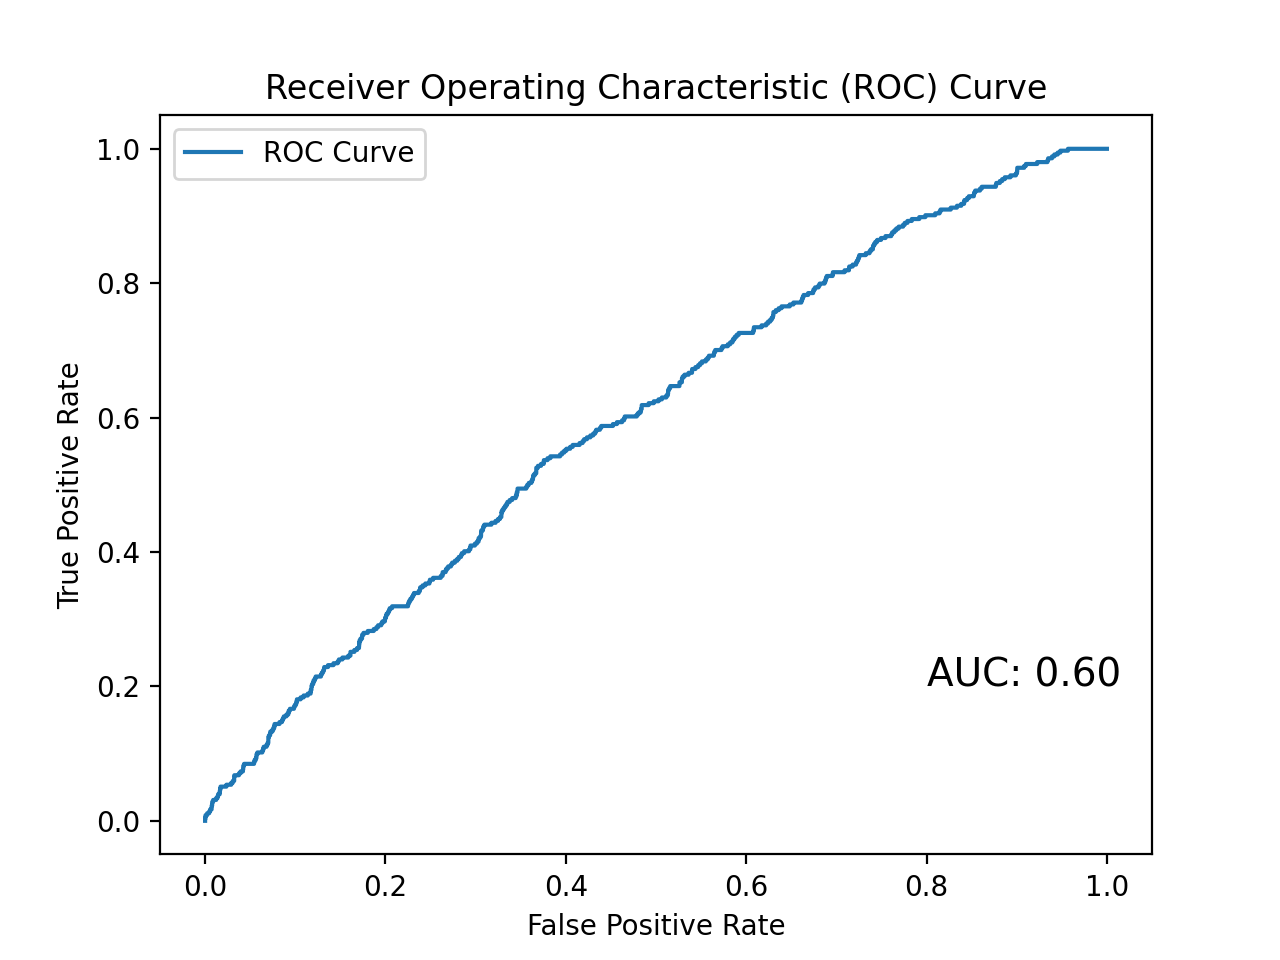

Optimal Threshold: 0.06


In [161]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y, logistic_model4.predict_proba(X4)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold4 = thresholds[np.argmax(tpr - fpr)]
print(f"Optimal Threshold: {optimal_threshold4:.2f}")

In [162]:
#getting expected losses for each model

#defining a loss function (would be from 0 to 1), 0 being the best
def zero_one_loss(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

#predicted probabilities for each model
y_prob = logistic_model.predict_proba(X1)[:, 1]
y_prob2 = logistic_model2.predict_proba(X2)[:, 1]
y_prob3 = logistic_model3.predict_proba(X3)[:, 1]
y_prob4 = logistic_model4.predict_proba(X4)[:, 1]


#using each model's optimal threshold to get binary predictions
y_pred = (y_prob >= optimal_threshold).astype(int)
y_pred2 = (y_prob2 >= optimal_threshold2).astype(int)
y_pred3 = (y_prob3 >= optimal_threshold3).astype(int)
y_pred4 = (y_prob4 >= optimal_threshold4).astype(int)

#getting expected loss for each model 
loss = 'N/A' #the expected loss was a shockingly low #, then I realized that the optimal threshold for this model 
#was inf due to it's poor fit/prediction ability and therefore made the expected loss value N/A
loss2 = zero_one_loss(y, y_pred2)
loss3 = zero_one_loss(y, y_pred3)
loss4 = zero_one_loss(y, y_pred4)
print(f"Model 1 Expected Loss: {loss} (due to optimal threshold of inf)")
print(f"Model 2 Expected Loss: {loss2:.4f}")
print(f"Model 3 Expected Loss: {loss3:.4f}")
print(f"Model 4 Expected Loss: {loss4:.4f}")
#best expected loss is model 3 (makes sense as model 3 also has the highest AUC value)

Model 1 Expected Loss: N/A (due to optimal threshold of inf)
Model 2 Expected Loss: 0.3500
Model 3 Expected Loss: 0.3987
Model 4 Expected Loss: 0.3780


In [163]:
#df to compare the models
pd.DataFrame({
    'Models': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    '# of Predictors': [len(X1.columns), len(X2.columns), len(X3.columns), len(X4.columns)],
    'Avg CV Accuracy': [np.mean(logistic_model.scores_[1].flatten()), np.mean(logistic_model2.scores_[1].flatten()), np.mean(logistic_model3.scores_[1].flatten()), np.mean(logistic_model4.scores_[1].flatten())],
    #'RMSE': [0.201, 0.202, 0.201, 0.201], not important as all values are the same
    'CV AUC': [0.5, 0.7943, 0.8480, 0.8198],
    'Optimal Threshold': [optimal_threshold, optimal_threshold2, optimal_threshold3, optimal_threshold4], 
    'Expected Loss': [loss, loss2, loss3, loss4]
})
#Model 3 seems to have the best CV AUC (and similar RMSE and CV Accuracy to the others)
#Model 1 seems to perform the worst when looking at the CV AUC scores

,Models,# of Predictors,Avg CV Accuracy,CV AUC,Optimal Threshold,Expected Loss
0,Model 1,32,0.973287,0.5000,inf,N/A
1,Model 2,9,0.932300,0.7943,0.448708,0.349985
2,Model 3,18,0.941798,0.8480,0.389404,0.398657
3,Model 4,28,0.972291,0.8198,0.062697,0.377981


In [164]:
#You should not use this sample for modeling, only for your final prediction’s evaluation. If you use
# these data in any (visible) way to estimate a model, you will be penalized with -10 points. You should
# report your final model of choice’s following measures on this hold-out sample:
# – Brier-score
# – ROC curve
# – AUC
# – Accuracy, sensitivity, specificity (for optimal threshold)
# – Expected loss and optimal threshold
# ∗ Expected loss is has the following parameters: loss(F N) = 15, loss(F P) = 3
# – In addition, report the same descriptive statistics: number of firms, firms defaulted and stayed
# alive. Mean of sales, minimum and maximum values. This helps our work to evaluate and compare
# your results.

In [165]:
#Holdout sample using Model 3
X3_holdout = holdout[variables[:18]]
predictions = logistic_model3.predict(X3_holdout)

In [166]:
# Assuming Model 3 outputs probabilities
predicted_probabilities = logistic_model3.predict_proba(X3_holdout)[:, 1]

# Set a threshold (e.g., 0.5) to classify instances
threshold = optimal_threshold3
predictions = (predicted_probabilities > threshold).astype(int)
#see avg (array of predictions is 0s and 1s (those who didn't default and those who did))
print(f"Holdout predictions value: {np.mean(predictions)}")
print(f"Number of Firms Predicted to Default: {holdout.shape[0] * np.mean(predictions)}")


Holdout predictions value: 0.32594021215043395
Number of Firms Predicted to Default: 338.0


In [ ]:
########DON'T KNOW IF THIS IS CORRECT!!!